In [1]:
import os
import sys
sys.path.append("..")
import pickle

from dataset_dataloader import ImageDataset
from arguments import prepare_parser
from vae_model.vae import VaeModel
from utils import load_checkpoint_model_for_eval
from analysis import get_n_data_samples_x_y, build_posterior_analysis_grid

import torch

%matplotlib inline
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

# Load relevant checkpoints

In [2]:
checkpoint_dir = "../run_files/checkpoints"
checkpoint_dict = dict()

for i, c in enumerate(os.listdir(checkpoint_dir)):
    print(i, c)
    checkpoint_dict[i] = c

0 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:07:15.pt
1 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:07:15.pt
2 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) conditional_made_decoder - 2021-09-22-11:11:15.pt
3 q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:31:20.pt
4 q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:48:20.pt
5 q(z|x) basic_mlp_encoder - independent_gaussian | p(x|z) basic_mlp_decoder - 2021-09-22-11:50:42.pt
6 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) basic_mlp_decoder - 2021-09-22-11:50:42.pt
7 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) conditional_made_decoder - 2021-09-22-11:50:42.pt
8 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) basic_deconv_decoder - 2021-09-22-11:50:42.pt
9 q(z|x) basic_mlp_encoder -

# Posterior analysis grid

In [3]:
# PLOT SAVING
plot_dir = "posterior-plots"
os.makedirs(plot_dir, exist_ok=True)

# DATA
data_X, data_y = get_n_data_samples_x_y(image_dataset_name="bmnist", N_samples=1000)

0 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:07:15.pt
best val loss 83.31


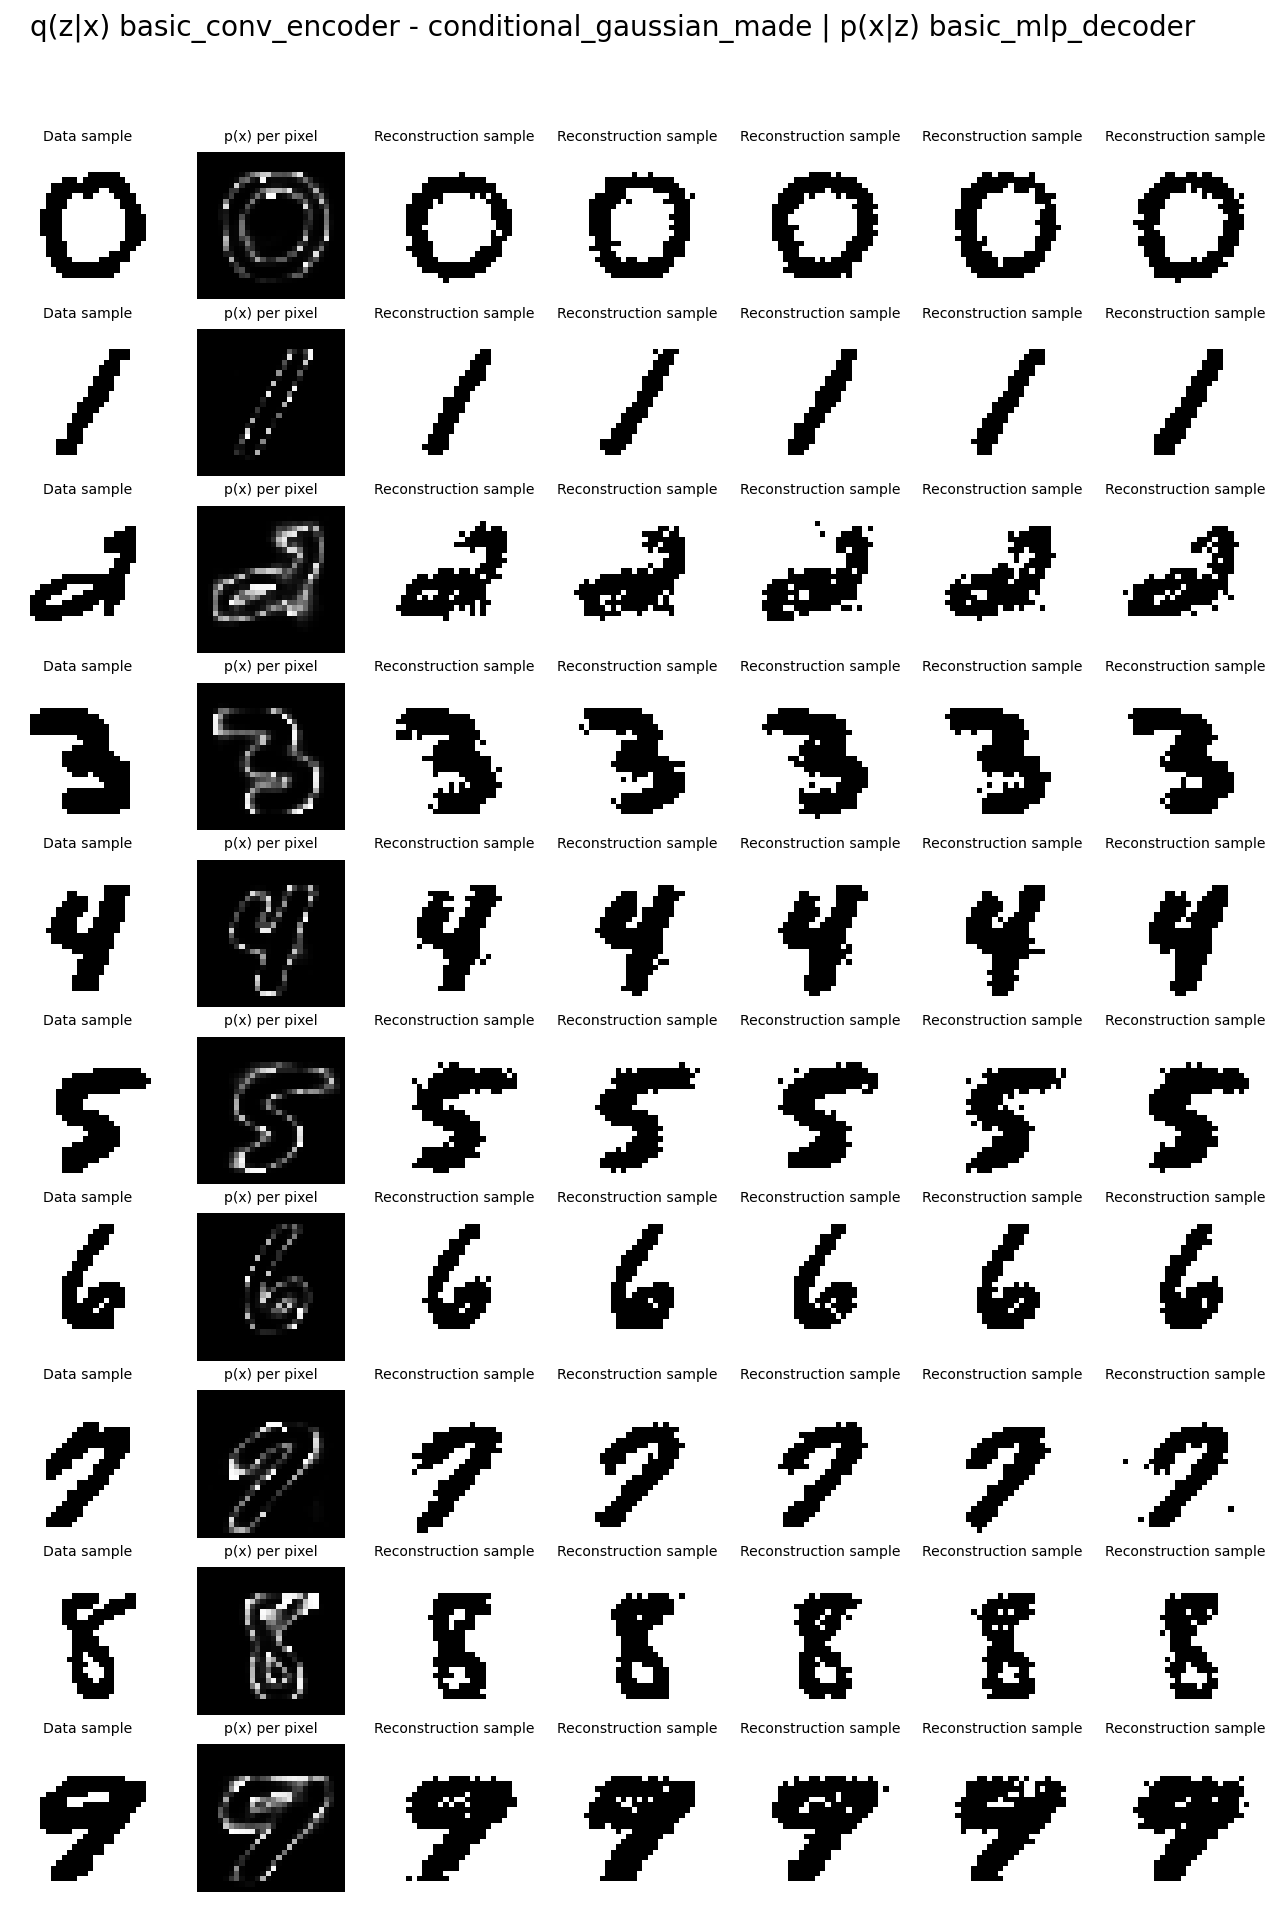

1 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:07:15.pt
best val loss 83.29


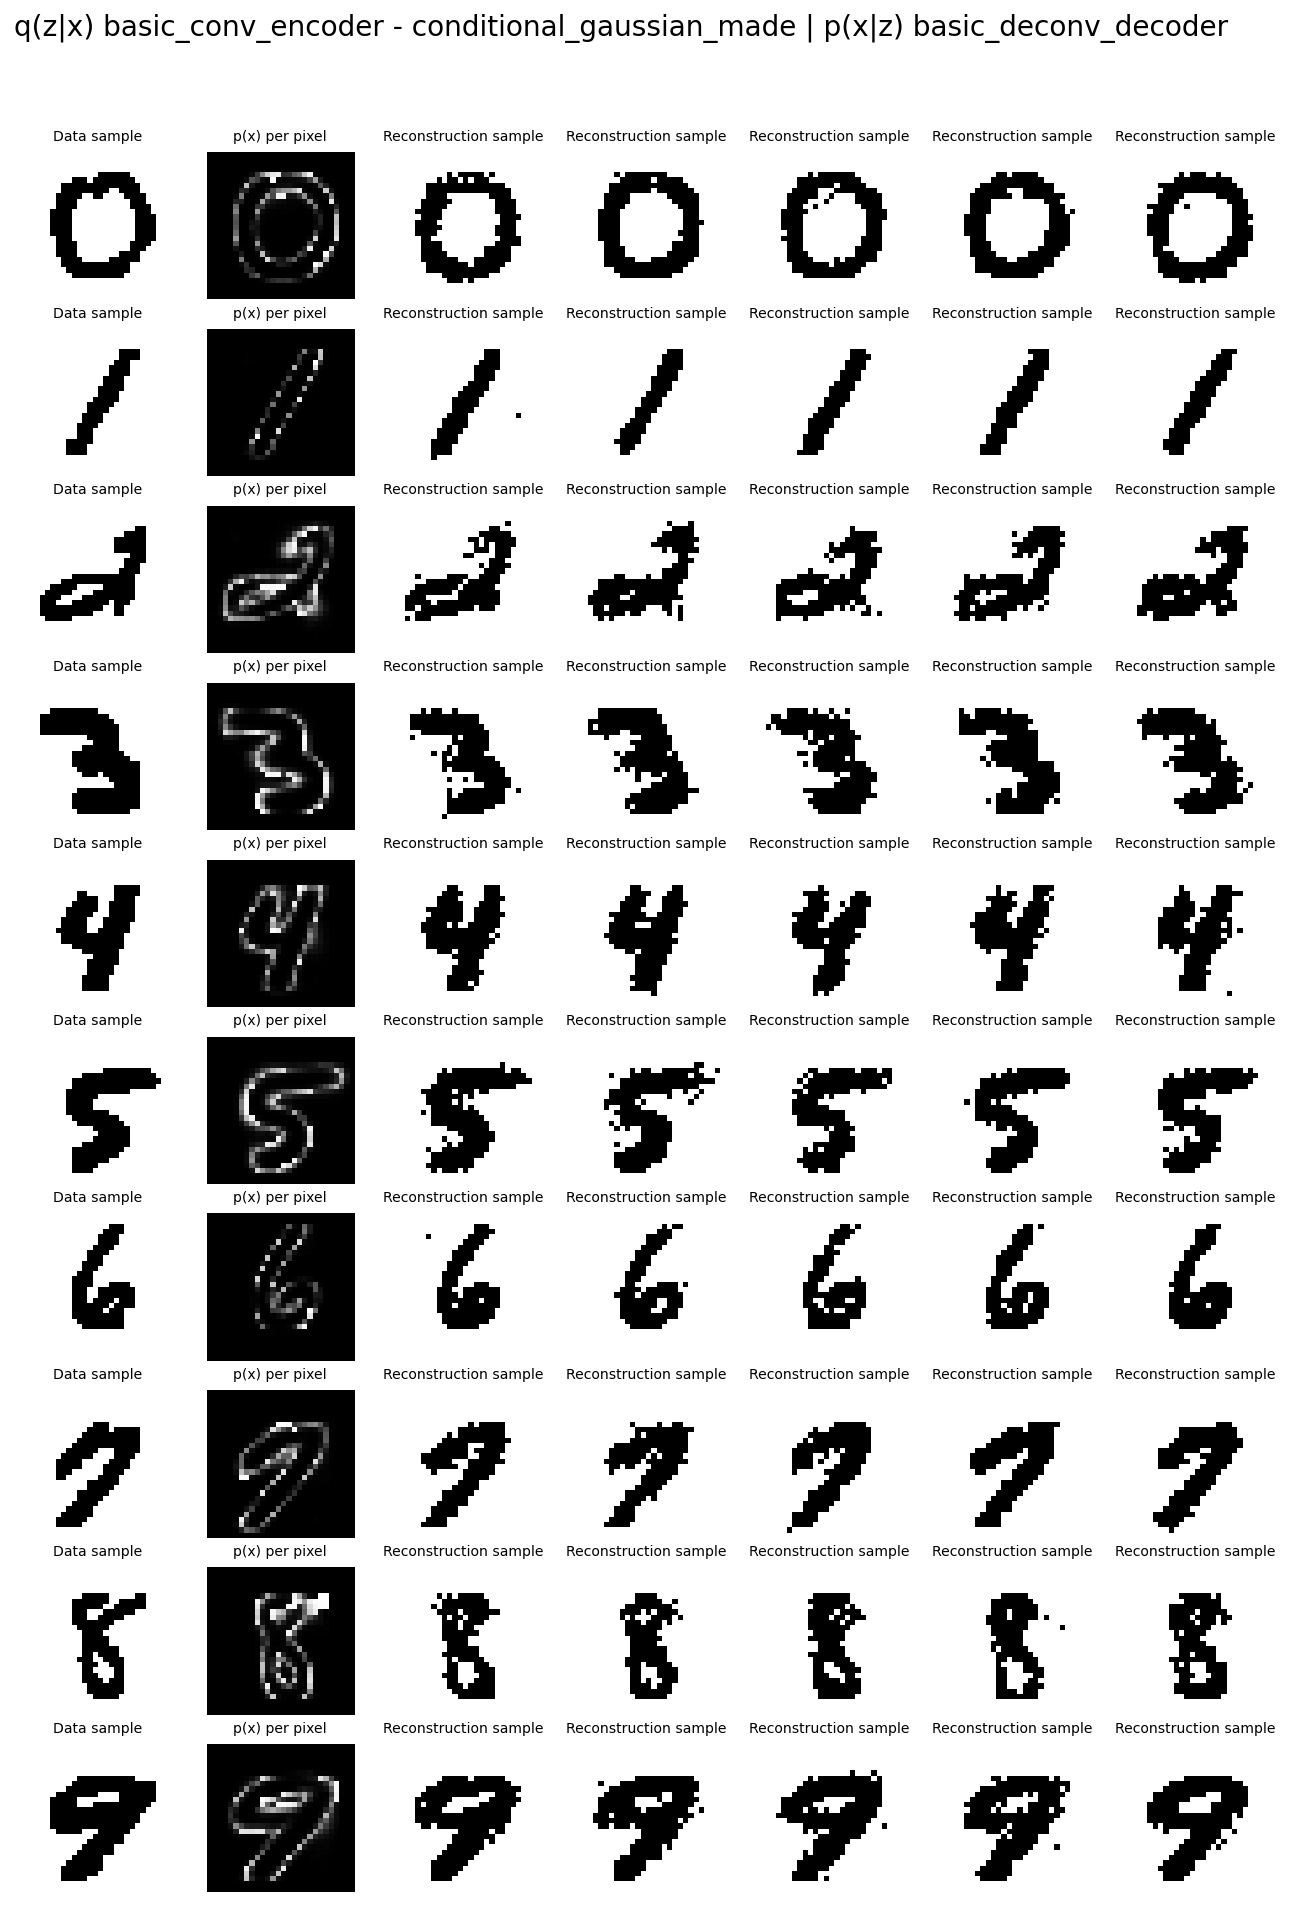

2 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) conditional_made_decoder - 2021-09-22-11:11:15.pt
best val loss 83.44


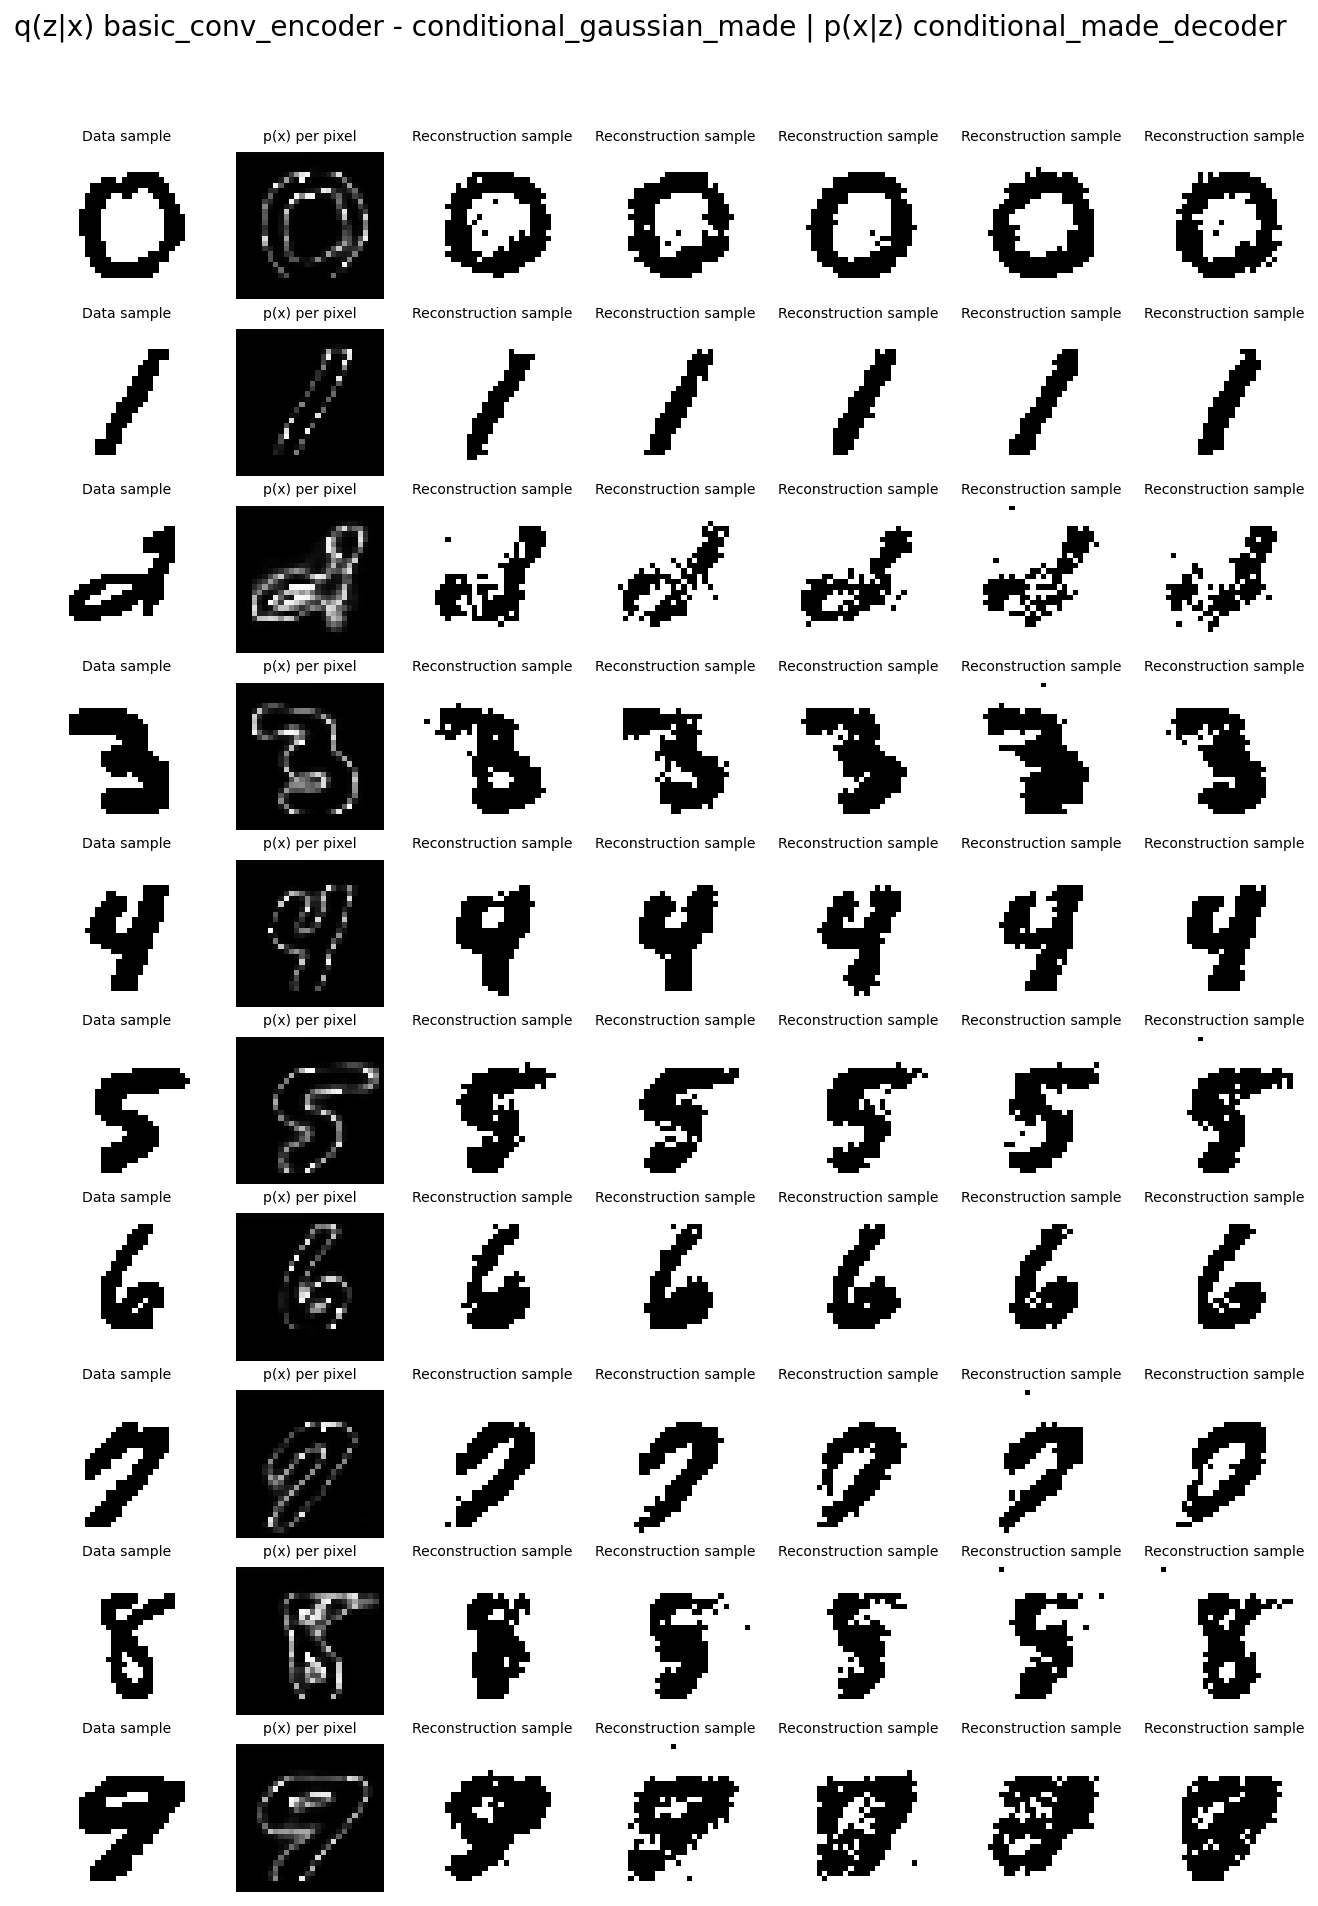

3 q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:31:20.pt
best val loss 87.91


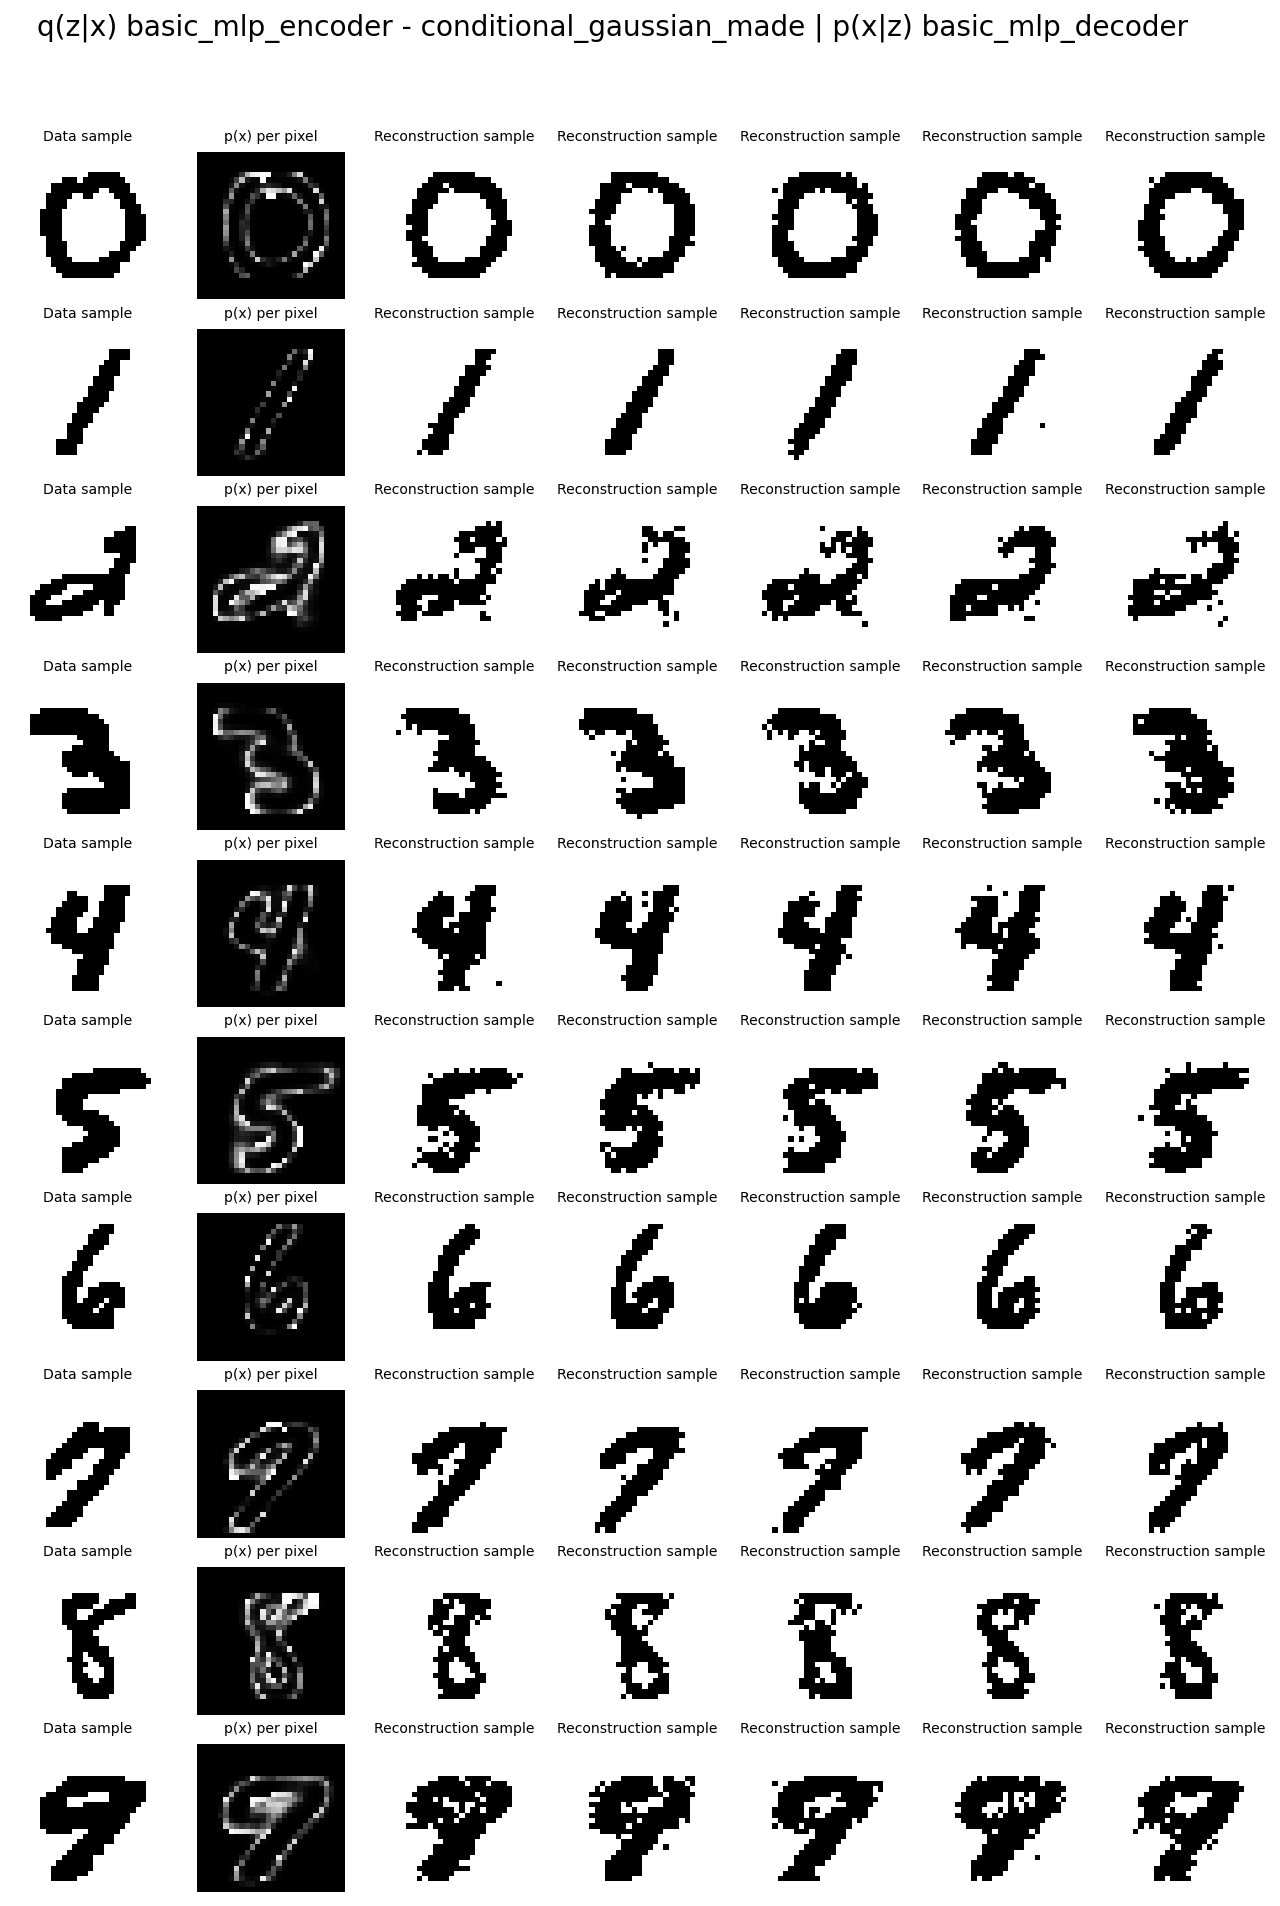

4 q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:48:20.pt
best val loss 90.53


KeyboardInterrupt: 

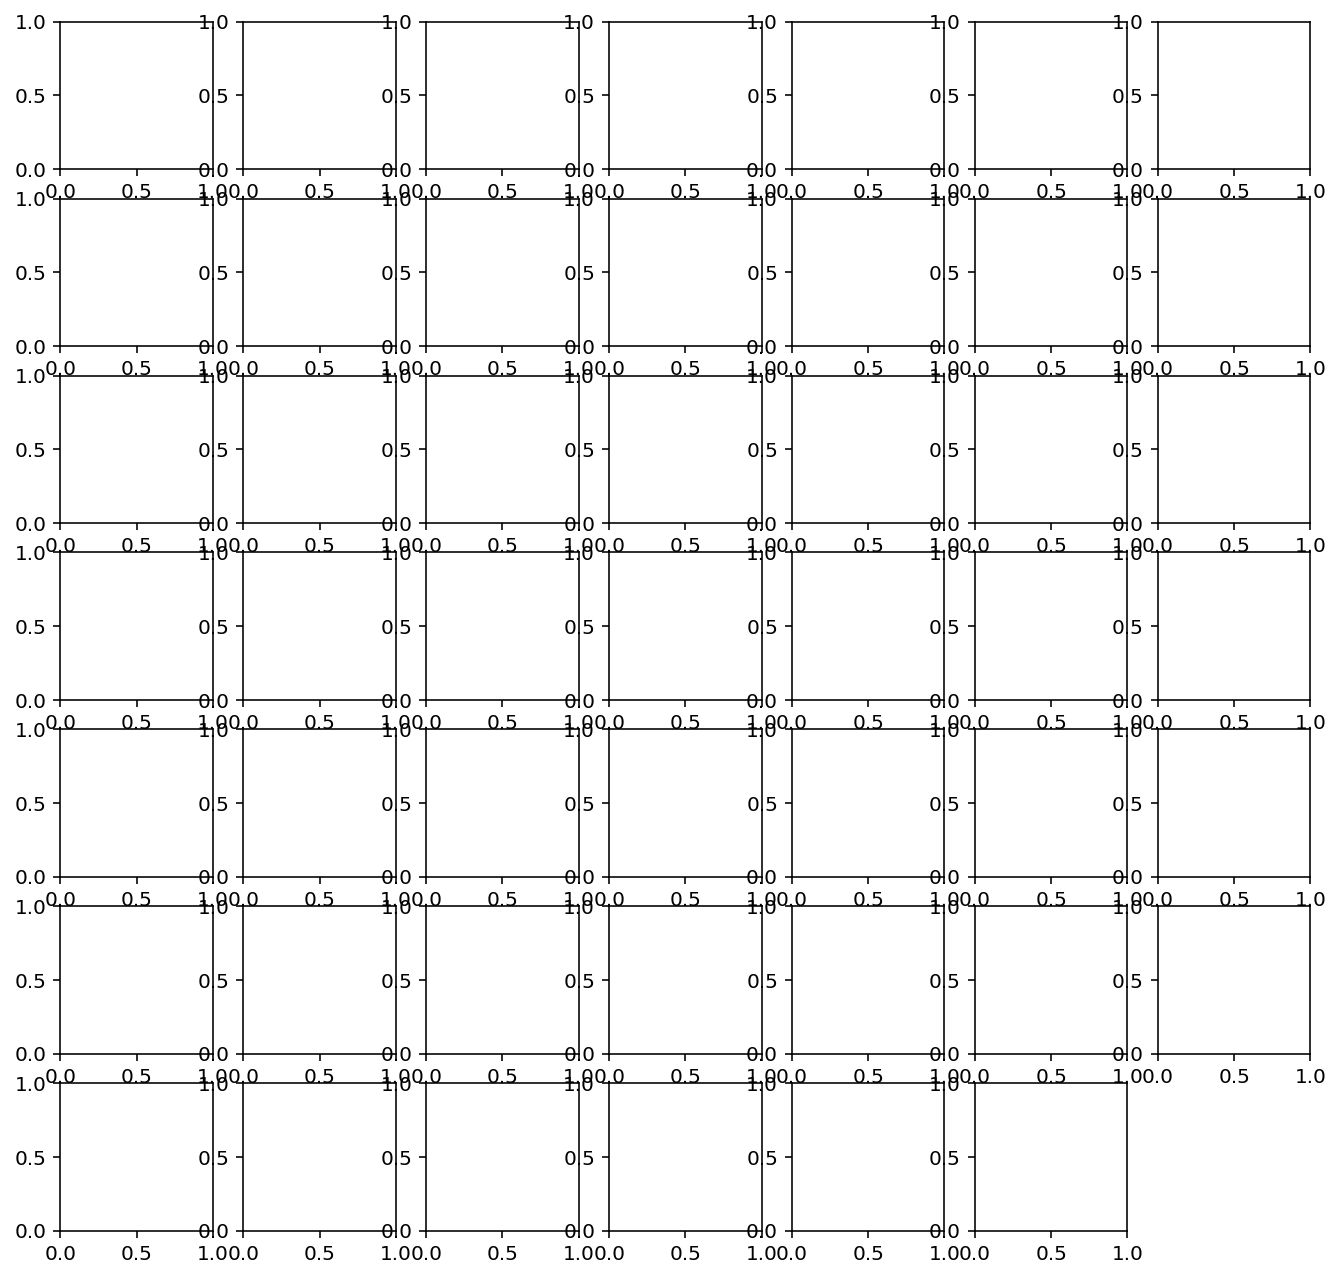

In [4]:
# MAKE PRIOR GRID PLOTS
for C_N in range(12):
    print(C_N, checkpoint_dict[C_N])

    checkpoint_path = f"{checkpoint_dir}/{checkpoint_dict[C_N]}"

    vae_model = load_checkpoint_model_for_eval(checkpoint_path)

    clean_name = checkpoint_dict[C_N].split("- 2021")[0]

    build_posterior_analysis_grid(vae_model=vae_model, plot_name=clean_name, plot_dir=plot_dir,
                                  data_X=data_X, data_y=data_y, n_sampled_reconstructions=5)